In [1]:
!pip install scikit-learn

In [2]:
import sklearn
print(sklearn.__version__)

1.6.1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

In [5]:
# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# 3. 파이프라인 생성 (Transformer와 Estimator 연결)
#    - 'scaler': StandardScaler (재료 손질 도구)
#    - 'classifier': SVC (요리사)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='linear'))
])

In [7]:
# 4. 파이프라인 학습 (fit() 한 번으로 전처리 및 학습 완료)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', SVC(kernel='linear'))])

In [8]:
# 5. 파이프라인 예측 (predict() 한 번으로 전처리된 데이터에 대한 예측)
y_pred = pipeline.predict(X_test)

In [9]:
# 6. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"파이프라인을 사용한 모델의 정확도: {accuracy:.4f}")

파이프라인을 사용한 모델의 정확도: 1.0000


In [11]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import set_config # 파이프라인 시각화를 위한 함수

In [13]:
# 1. 데이터 생성
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, random_state=42)
X[0, 2] = np.nan # 결측치 추가
X[5, 8] = np.nan # 결측치 추가

In [14]:
# 2. 파이프라인 생성 (Transformer 두 개와 Estimator 하나를 연결)
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [15]:
# 3. 파이프라인 시각화 설정
# 'display' 옵션을 'diagram'으로 설정하여 파이프라인 구조를 시각화합니다.
set_config(display='diagram')

In [16]:
# 4. 파이프라인 출력
# 이 코드를 실행하면 아래와 같은 그림이 출력됩니다.
pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [17]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import set_config

In [18]:
# 1. 데이터 생성 (가상의 결측치가 포함된 데이터)
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, random_state=42)
X[0, 2] = np.nan # 첫 번째 샘플의 세 번째 특성에 결측치 추가
X[5, 8] = np.nan # 여섯 번째 샘플의 아홉 번째 특성에 결측치 추가

In [19]:
# 2. 파이프라인 생성 (Transformer 두 개와 Estimator 하나를 연결)
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [20]:
# 파이프라인 시각화 설정
set_config(display='diagram')

In [21]:
# 파이프라인 출력
pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인 학습
print("파이프라인 학습 시작...")
pipeline.fit(X_train, y_train)
print("파이프라인 학습 완료!")

파이프라인 학습 시작...
파이프라인 학습 완료!


In [23]:
# 파이프라인 예측
y_pred = pipeline.predict(X_test)
print("예측 완료!")

예측 완료!


In [24]:
# 파이프라인의 각 단계에 접근하여 중간 결과 확인 (추가 코드)
# 파이프라인 학습 후 실행
fitted_imputer = pipeline.named_steps['imputer']
transformed_X_train_after_impute = fitted_imputer.transform(X_train)

fitted_scaler = pipeline.named_steps['scaler']
transformed_X_train_after_scale = fitted_scaler.transform(transformed_X_train_after_impute)

print("\n--- 파이프라인 중간 결과 (훈련 데이터) ---")
print("결측치 처리 후 데이터 (일부):\n", transformed_X_train_after_impute[:5, :5])
print("\n스케일링 후 데이터 (일부):\n", transformed_X_train_after_scale[:5, :5])


--- 파이프라인 중간 결과 (훈련 데이터) ---
결측치 처리 후 데이터 (일부):
 [[-0.37655265  1.54136135 -1.95463489 -0.70521074  0.17199756]
 [ 1.24669474 -0.44533619  1.98615587 -2.16987769  0.38178928]
 [ 0.16469783  1.31713155 -1.72606749 -0.36253503 -0.09032813]
 [ 1.64639724  2.53571969  2.68720074 -1.00708936  1.6042973 ]
 [ 0.80443911  2.52167899 -2.35083035 -0.15721389  0.72456704]]

스케일링 후 데이터 (일부):
 [[-0.31228727  0.44734049 -0.81684421 -0.71463816  0.03672091]
 [ 1.23723819 -0.59281257  1.66096071 -2.05117588  0.19545869]
 [ 0.2043816   0.32994299 -0.67313056 -0.40193976 -0.16176642]
 [ 1.61878767  0.96794558  2.10174849 -0.99010841  1.12046283]
 [ 0.81506818  0.96059445 -1.0659554  -0.21458014  0.45481965]]


In [27]:
import numpy as np
from sklearn.datasets import make_classification

In [29]:
# 기존 코드 수정
# 1. 데이터 생성
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, random_state=42)

# 2. 특정 위치에 결측치 추가
# X[샘플번호, 특성번호] = np.nan
X[0, 2] = np.nan # 첫 번째 샘플의 세 번째 특성에 결측치 추가
X[5, 8] = np.nan # 여섯 번째 샘플의 아홉 번째 특성에 결측치 추가

print("데이터가 생성되었습니다. X의 일부:\n", X[:3])

데이터가 생성되었습니다. X의 일부:
 [[-0.14903667  3.63978999         nan -0.00665345 -1.71293663 -2.74589377
  -1.02482265  4.48737083 -1.12541901 -1.01485345]
 [ 2.64357158  2.24772014  0.26929568 -0.20284622  2.75714707  2.67454621
  -2.02422497  0.30130793  0.18053084  1.45580425]
 [ 0.34313505 -0.94576041  0.55792009  1.3238748  -1.24906205  2.29192503
  -0.74430305 -0.26229478  1.20562808 -0.7259419 ]]


In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 트랜스포머 생성
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# 에스티메이터 생성
classifier = LogisticRegression()

print("트랜스포머와 에스티메이터 객체가 생성되었습니다.")
print("트랜스포머 (결측치 채우기):", imputer)
print("트랜스포머 (스케일링):", scaler)
print("에스티메이터 (분류기):", classifier)

트랜스포머와 에스티메이터 객체가 생성되었습니다.
트랜스포머 (결측치 채우기): SimpleImputer()
트랜스포머 (스케일링): StandardScaler()
에스티메이터 (분류기): LogisticRegression()


In [31]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

# 파이프라인 시각화 설정
set_config(display='diagram')

# 파이프라인 연결
pipeline = Pipeline([
    ('imputer', imputer),         # 1단계: 결측치 채우기
    ('scaler', scaler),           # 2단계: 스케일링
    ('classifier', classifier)    # 3단계: 분류기 학습
])

print("파이프라인이 연결되었습니다. 시각화된 구조:")
pipeline

파이프라인이 연결되었습니다. 시각화된 구조:


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인 학습 (내부적으로 각 단계가 순서대로 실행됨)
print("파이프라인 학습 시작...")
pipeline.fit(X_train, y_train)
print("파이프라인 학습 완료!")

# 파이프라인 예측 (내부적으로 전처리 후 예측 실행)
y_pred = pipeline.predict(X_test)
print("예측 완료!")

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델의 정확도: {accuracy:.4f}")

파이프라인 학습 시작...
파이프라인 학습 완료!
예측 완료!
모델의 정확도: 0.9000


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 가상의 집 정보 데이터 생성
data = {
    '면적': [80, 90, 100, 110, 120, 130, 140, 150, 160, 170],
    '방_개수': [2, 3, 3, 3, 4, 4, 4, 5, 5, 5],
    '역세권_거리': [1.5, 0.5, 2.0, 1.0, 0.3, 2.5, 1.2, 0.8, 1.8, 0.7],
    '가격': [35000, 42000, 38000, 45000, 55000, 48000, 58000, 65000, 62000, 70000]
}
house_df = pd.DataFrame(data)

# 특성(X)과 정답(y) 데이터 분리
# 면적, 방_개수, 역세권_거리를 특성(X)으로 사용하고, 가격을 정답(y)으로 사용
X = house_df[['면적', '방_개수', '역세권_거리']]
y = house_df['가격']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("데이터 준비 완료. 특성(X)의 일부:\n", X.head())
print("\n데이터 분할 완료. 훈련 데이터 크기:", X_train.shape)
print("데이터 분할 완료. 테스트 데이터 크기:", X_test.shape)


데이터 준비 완료. 특성(X)의 일부:
     면적  방_개수  역세권_거리
0   80     2     1.5
1   90     3     0.5
2  100     3     2.0
3  110     3     1.0
4  120     4     0.3

데이터 분할 완료. 훈련 데이터 크기: (7, 3)
데이터 분할 완료. 테스트 데이터 크기: (3, 3)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# 파이프라인 생성 (Transformer와 Estimator 연결)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression()) # Estimator: 집 가격을 예측하는 회귀 모델
])

# 파이프라인 학습
print("\n파이프라인 학습 시작...")
pipeline.fit(X_train, y_train)
print("파이프라인 학습 완료!")


파이프라인 학습 시작...
파이프라인 학습 완료!


In [38]:
from sklearn.metrics import mean_squared_error

# 파이프라인 예측
y_pred = pipeline.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
print("\n테스트 데이터로 예측한 집 가격:", y_pred.round())
print("테스트 데이터의 실제 집 가격:", y_test.values)
print(f"\n평균 제곱 오차(MSE): {mse:.4f}")


테스트 데이터로 예측한 집 가격: [62414. 43216. 48040.]
테스트 데이터의 실제 집 가격: [62000 42000 48000]

평균 제곱 오차(MSE): 550574.8500


In [39]:
from sklearn import set_config

set_config(display='diagram')
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

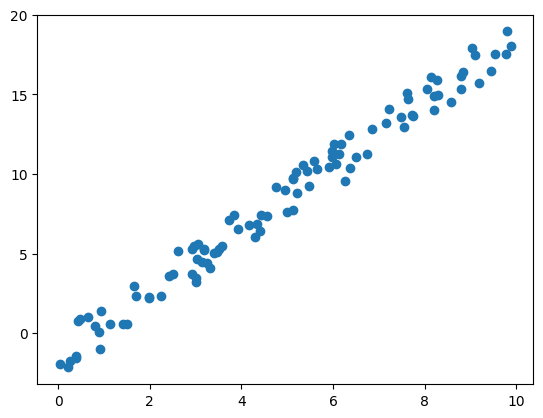

In [40]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 재현 가능한 난수 생성을 위해 RandomState 객체 생성
r = np.random.RandomState(10)

# 0에서 10 사이의 균등 분포를 따르는 난수 100개를 생성하여 x에 저장
x = 10 * r.rand(100)

# y_clean: 노이즈가 없는 완벽한 선형 관계 (y = 2x)
y_clean = 2 * x

# y_noisy: 노이즈가 추가된 선형 관계 (y = 2x - 3*random)
y_noisy = 2 * x - 3 * r.rand(100)

/tmp/ipython-input-2568495064.py:23: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 간 간격 자동 조절
/tmp/ipython-input-2568495064.py:23: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 간 간격 자동 조절
/tmp/ipython-input-2568495064.py:23: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 간 간격 자동 조절
/tmp/ipython-input-2568495064.py:23: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 간 간격 자동 조절
/tmp/ipython-input-2568495064.py:23: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 간 간격 자동 조절
/tmp/ipython-input-2568495064.py:23: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 그래프 간 간격 자동 조절
/tmp/ipython-input-2568495064.py:23: UserW

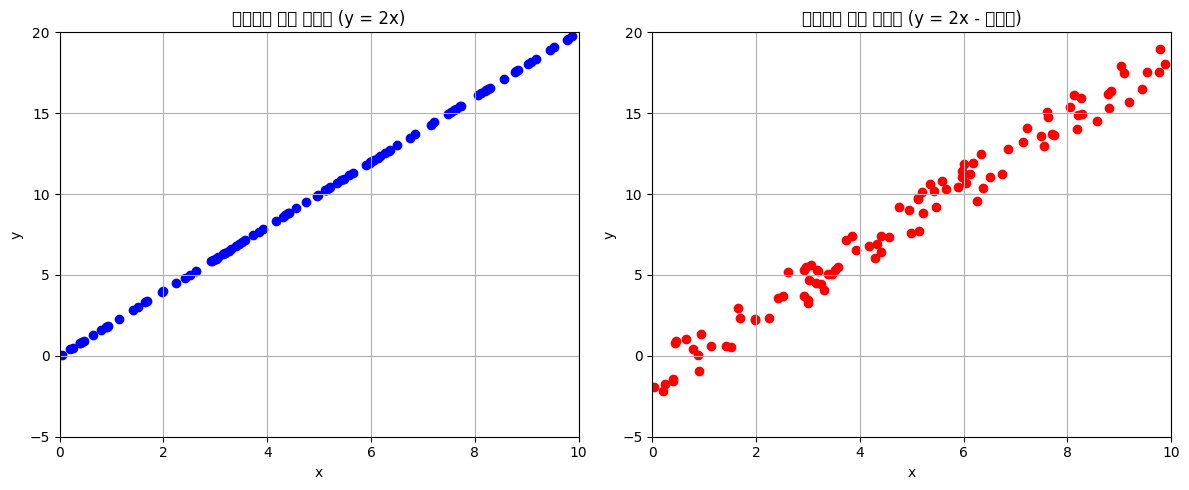

In [42]:
# 두 개의 서브플롯(그래프)을 생성하여 나란히 배치
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- 첫 번째 서브플롯: 노이즈가 없는 데이터 ---
ax1.scatter(x, y_clean, color='blue')
ax1.set_title("노이즈가 없는 데이터 (y = 2x)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_xlim([0, 10])
ax1.set_ylim([-5, 20])
ax1.grid(True)

# --- 두 번째 서브플롯: 노이즈가 있는 데이터 ---
ax2.scatter(x, y_noisy, color='red')
ax2.set_title("노이즈가 있는 데이터 (y = 2x - 노이즈)")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_xlim([0, 10])
ax2.set_ylim([-5, 20])
ax2.grid(True)

# 그래프 표시
plt.tight_layout() # 그래프 간 간격 자동 조절
plt.show()

In [43]:
x.shape

(100,)

In [44]:
y.shape

(100,)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [46]:
# ! 에러 발생
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[7.71320643 0.20751949 6.33648235 7.48803883 4.98507012 2.24796646
 1.98062865 7.60530712 1.69110837 0.88339814 6.85359818 9.53393346
 0.03948266 5.12192263 8.12620962 6.12526067 7.21755317 2.91876068
 9.17774123 7.14575783 5.42544368 1.42170048 3.7334076  6.74133615
 4.41833174 4.34013993 6.17766978 5.13138243 6.50397182 6.01038953
 8.05223197 5.21647152 9.08648881 3.19236089 0.90459349 3.00700057
 1.13984362 8.28681326 0.46896319 6.26287148 5.47586156 8.19286996
 1.9894754  8.56850302 3.51652639 7.54647692 2.95961707 8.8393648
 3.25511638 1.65015898 3.92529244 0.93460375 8.21105658 1.5115202
 3.84114449 9.44260712 9.87625475 4.56304547 8.26122844 2.51374134
 5.97371648 9.0283176  5.34557949 5.90201363 0.39281767 3.57181759
 0.7961309  3.05459918 3.30719312 7.73830296 0.39959209 4.29492178
 3.14926872 6.36491143 3.4634715  0.43097356 8.79915175 7.63240587
 8.78096643 4.17509144 6.05577564 5.13466627 5.97836648 2.62215661
 3.00871309 0.25399782 3.03062561 2.42075875 5.57578189 5.6550702
 4.75132247 2.92797976 0.64251061 9.78819146 3.39707844 4.95048631
 9.77080726 4.40773825 3.18272805 5.19796986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
X = x.reshape(100,1)

In [48]:
%%time
model.fit(X,y)

CPU times: user 943 µs, sys: 0 ns, total: 943 µs
Wall time: 920 µs


LinearRegression()

In [51]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

In [52]:
X_ = x_new.reshape(-1,1)
X_.shape

(100, 1)

In [53]:
# Q. 아래 mse를 구하는 과정을 직접 구현해보세요.
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y,y_new))

print(error)

9.299028215052264


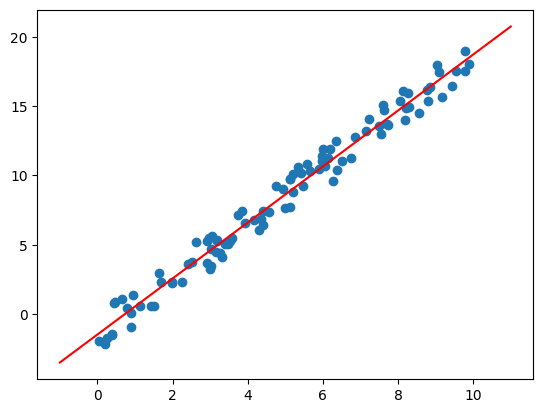

In [54]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

In [55]:
from sklearn.datasets import load_wine
data = load_wine()
type(data)


sklearn.utils._bunch.Bunch

In [56]:
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [57]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [58]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [59]:
data.data.shape

(178, 13)

In [60]:
data.data.ndim

2

In [61]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [62]:
data.target.shape

(178,)

In [63]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [65]:
len(data.feature_names)

13

In [66]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [67]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [68]:
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [69]:
X = data.data
y = data.target

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [71]:
%%time
model.fit(X, y)

CPU times: user 161 ms, sys: 521 µs, total: 162 ms
Wall time: 171 ms


RandomForestClassifier()

In [72]:
y_pred = model.predict(X)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#타겟 벡터 즉 라벨인 변수명 y와 예측값 y_pred을 각각 인자로 넣습니다.
print(classification_report(y, y_pred))
#정확도를 출력합니다.
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


In [1]:
from sklearn.datasets import load_wine
data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [2]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [3]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


In [4]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

CPU times: user 1.1 s, sys: 77.5 ms, total: 1.17 s
Wall time: 2.08 s


RandomForestClassifier()

In [5]:
y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9166666666666666


In [9]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# 2. 데이터 로드 및 X, y 변수 정의 (이 부분이 반드시 먼저 실행되어야 합니다!)
wine_data = load_wine()
X = wine_data.data  # 특성 데이터
y = wine_data.target # 정답 레이블



In [10]:
print(type(result))
print(len(result))

<class 'list'>
4


In [11]:
result[0].shape

(142, 13)

In [12]:
result[1].shape

(36, 13)

In [13]:
result[2].shape

(142,)

In [14]:
result[3].shape

(36,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
%%time
# Q. 위에서 배운 내용을 토대로 내용을 정리해서 아래의 [[YOUR CODE]]를 완성해주세요.
# 데이터셋 로드하기
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target

# 훈련용 데이터셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 훈련하기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측하기
y_pred = model.predict(X_test)

# 정답률 출력하기
from sklearn.metrics import accuracy_score
print("정답률=", accuracy_score(y_test, y_pred))

정답률= 0.9722222222222222
CPU times: user 231 ms, sys: 672 µs, total: 232 ms
Wall time: 261 ms
